Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import statsmodels.api as sm
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from math import sqrt
import statistics
from scipy import stats

# Задача 3.5

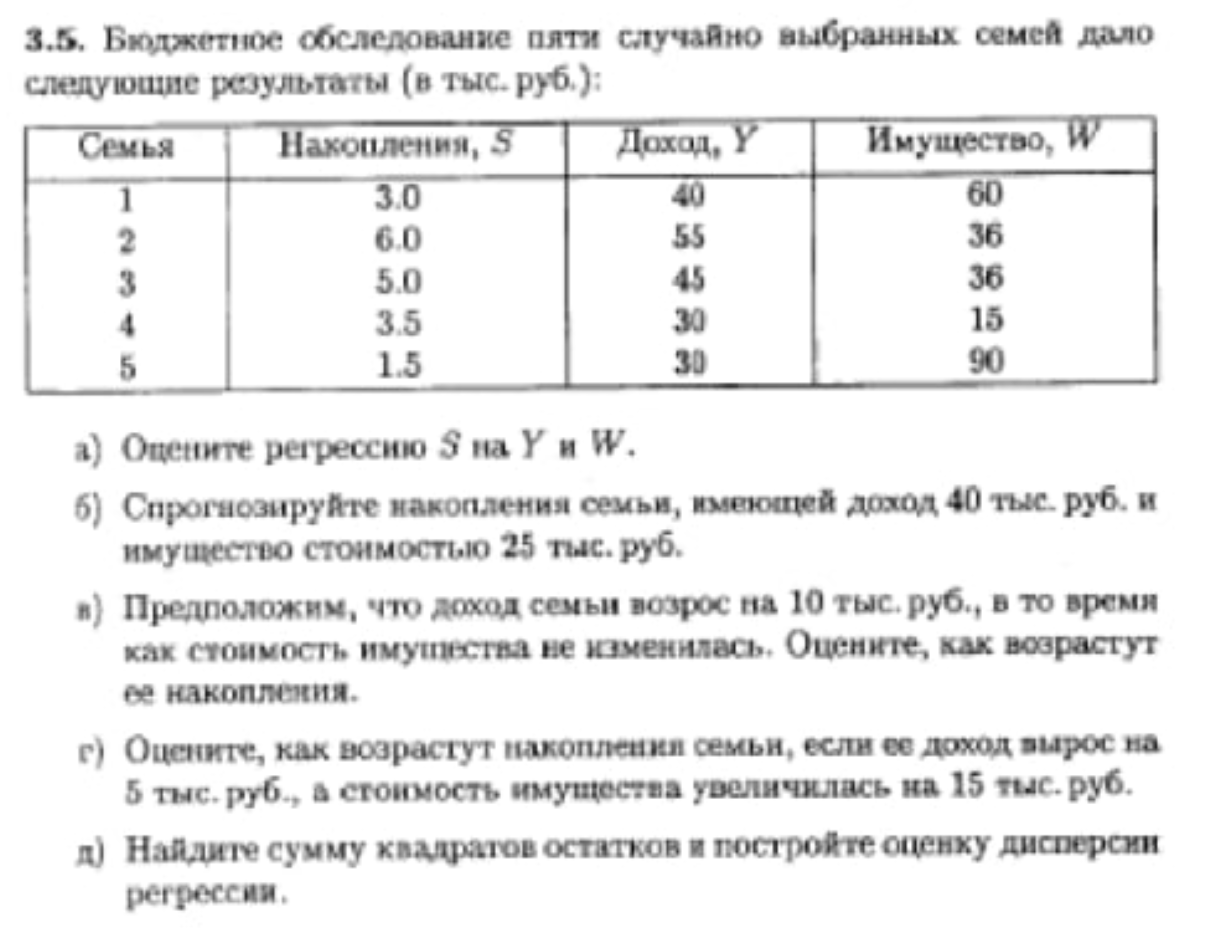

In [2]:
Image("./Доп задача 3.5.png")

## Пункт а)

Уравнение регрессии будем искать в виде: y = $\alpha$ + $\beta_1*x_1$ + $\beta_2*x_2$

Тогда мы можем записать такие матрицы: $ Y = \begin{pmatrix}
3\\
6\\
5\\
3,5\\
1,5\\
\end{pmatrix} $,      $ X = \begin{pmatrix}
40&60\\
55&36\\
45&36\\
30&15\\
30&90\\
\end{pmatrix} $

In [3]:
data = pd.read_excel('Доп задача 3.5.xlsx', 'ДопЗадача')[['Доходы', 'Имущество', 'Накопления']]
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
data.head()

,Доходы,Имущество,Накопления
0,40,60,3.0
1,55,36,6.0
2,45,36,5.0
3,30,15,3.5
4,30,90,1.5


Построение регрессии

In [4]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_


f'y = {skm.coef_[0]}*[Доходы] + {skm.coef_[1]}*[Имущество] + {skm.intercept_}'

'y = 0.12287912666052875*[Доходы] + -0.02940725152352142*[Имущество] + 0.27873865579376567'

В результате получаем неизвестные коэфициенты в уравнении: y = 0.12$*$[Доходы] - 0.03$*$[Имущество] + 0.28



## Пункт б)

По условию задачи:

\begin{equation*}
 \begin{cases}
   [Доходы] = 40  тыс.руб \\
   [Имущество] = 25  тыс.руб
 \end{cases}
\end{equation*}

Тогда просто подставим эти значения в полученную в прошлом пункте регрессию:

In [5]:
print('[Прогнозируемые накопления] =',round(0.12287912666052875*40 -0.02940725152352142*25 + 0.27873865579376567, 1))

[Прогнозируемые накопления] = 4.5


## Пункт в)

Продолжаем игры с уравнением регрессии. Предположим, что доход семьи возрос на $\delta$, в то время как стоимость имущества осталась постоянной. Тогда запишем сиситему:

\begin{equation*}
 \begin{cases}
   y_1 = \alpha + \beta_1*x_1 + \beta_2*x_2 \\
   y_2 = \alpha + \beta_1*(x_1+\delta) + \beta_2*x_2
 \end{cases}
\end{equation*}

Выразим: $\alpha +\beta_2*x_2=y_1-\beta_1*x_1=y_2-\beta_1*(x_1+\delta)$. 

Тогда оценим дельту: $y_2-y_1=\beta_1*x_1-\beta_1*(x_1+\delta)=\beta_1*x_1-\beta_1*x_1+\beta_1*\delta=\beta_1*\delta$

Подставим $\delta =$ 10 тыс.руб

In [6]:
print('В итоге получаем, что y2−y1 =',round(0.12287912666052875*10, 1),'тыс.руб')

В итоге получаем, что y2−y1 = 1.2 тыс.руб


## Пункт г)

Из предыдущего пункта заметим, что вклад прироста любой из переменных в накопления складывается из прироста, умноженного на соответствующий коэффициентов регрессии. Тогда просто посчитаем:

In [7]:
print('Получаем, что y2−y1 =',round(0.12287912666052875*5-0.02940725152352142*15, 1),'тыс.руб')

Получаем, что y2−y1 = 0.2 тыс.руб


## Пункт д)

По найденному уравнению регрессии определим теоретические значения результирующего признака (Накопления):

In [8]:
data = pd.read_excel('Доп задача 3.5.xlsx', 'ДопЗадача')[['Доходы', 'Имущество', 'Накопления']]
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
data.rename(columns={'Доходы': 'x1', 'Имущество': 'x2', 'Накопления': 'y'}, inplace=True)
data['y_теор'] = 0.12287912666052875*data['x1'] -0.02940725152352142*data['x2'] + 0.27873865579376567
data['e'] = data['y'] - data['y_теор']
data['e^2'] = data['e']**2

data.head()

,x1,x2,y,y_теор,e,e^2
0,40,60,3.0,3.429469,-0.429469,0.184443
1,55,36,6.0,5.978430,0.021570,0.000465
2,45,36,5.0,4.749638,0.250362,0.062681
3,30,15,3.5,3.524004,-0.024004,0.000576
4,30,90,1.5,1.318460,0.181540,0.032957


Сумма квадратов остатков можно рассчитать по формуле: $\sum (y_i - y_{i_.теор})^2 = \sum e_i^2$

In [9]:
print('Сумма квадратов остатков: ',data['e^2'].sum())

Сумма квадратов остатков:  0.2811225831908453


Остаточную дисперсию можно рассчитать по формуле: $\sigma^2 = \frac{\sum (y_i - y_{i_.теор})^2}{n} = \frac{\sum e_i^2}{n}$

In [10]:
print('Остаточная дисперсия: ',data['e^2'].sum()/5)

Остаточная дисперсия:  0.05622451663816906


In [11]:
print('Дисперсия регрессии: ',statistics.variance(data['e']))

Дисперсия регрессии:  0.07028064579771132


# Вторая часть задания. Проверяем во всех пунктах линейное ограничение общего вида: $H\beta = r$

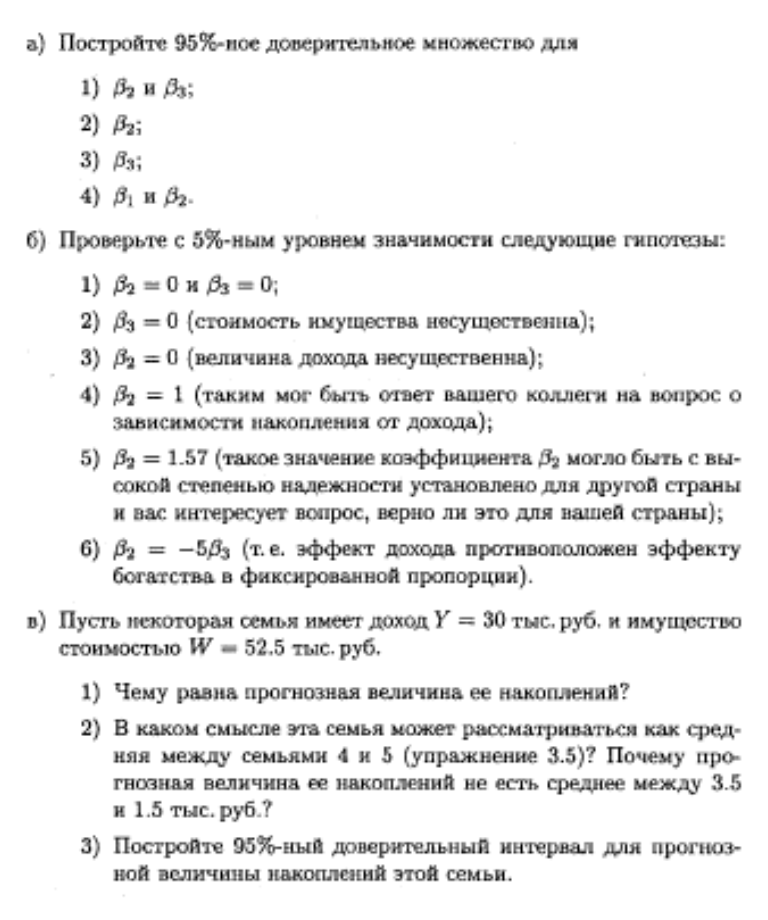

In [12]:
Image("./Доп задача 3.5 (2).png")

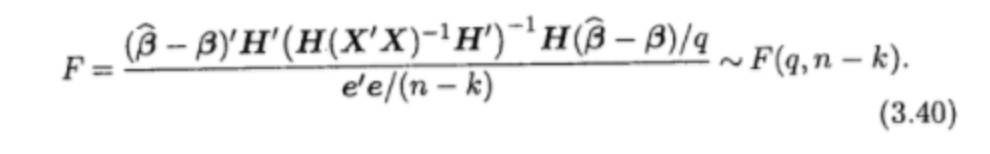

In [13]:
Image("./Доп задача 3.5 (1).png")

In [14]:
y = np.array([3, 6, 5, 3.5, 1.5])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])

In [15]:
def mat(H, x, beta): 
    A = H.T@np.linalg.inv((H@np.linalg.inv((x.T@x))@H.T))@H
    return A

## Пункт а)

### Пункт a.1) $\beta_2, \beta_3, q=2$

In [16]:
H = np.array([[1, 0], [0, 1]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
skm.fit(x, y)

LinearRegression()

In [17]:
A = mat(H, x, skm.coef_)
e = y - skm.predict(x)
c = (e.T@e)*2/3
print(c)
print(A)

0.1874150554605635
[[ 8450.  9150.]
 [ 9150. 14517.]]


Неравенство выглядит так: $(\hat{\beta} - \beta)'A (\hat{\beta} - \beta) \in [0; 19.16\cdot c],$, где $19.16$ - квантиль уровня $0.05$ у $F_{2,3}$

### Пункт а.2) $\beta_2,  q=1$, $216$ - квантиль уровня $0.05$ у $F_{1,3}$.

In [18]:
H = np.array([[ 1, 0]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
skm.fit(x, y)

LinearRegression()

In [19]:
A = mat(H, x, skm.coef_)
e = y - skm.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

0.09370752773028175
[[2682.79603224    0.        ]
 [   0.            0.        ]]


In [20]:
t_upper = skm.coef_[1] + sqrt(216)*c/A[0,0]
t_lower = skm.coef_[1] - sqrt(216)*c/A[0,0]
print(t_lower, t_upper)

-0.0299206016818756 -0.02889390136516724


In [21]:
skm.coef_[1]

-0.02940725152352142

### Пункт а.3) $\beta_3,  q=1$, $216$ - квантиль уровня $0.05$ у $F_{1,3}$.

In [22]:
H = np.array([[0, 1]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
skm.fit(x, y)

LinearRegression()

In [23]:
A = mat(H, x, skm.coef_)
e = y - skm.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

0.09370752773028175
[[   0.            0.        ]
 [   0.         4609.01183432]]


In [24]:
t_upper = skm.coef_[1] + sqrt(216)*c/A[1,1]
t_lower = skm.coef_[1] - sqrt(216)*c/A[1,1]
print(t_lower, t_upper)

-0.029706060426055884 -0.029108442620986955


### Пункт а.4) $\beta_1, \beta_2, q=2$

In [25]:
H = np.array([[1, 0, 0], [0, 1, 0]])
a = np.array([[1], [1], [1], [1], [1]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
x = np.hstack((a, x))
skm.fit(x, y)

LinearRegression()

In [26]:
A = mat(H, x, skm.coef_)
e = y - skm.predict(x)
c = (e.T@e)*2/3
print(c)
print(A)

0.18741505546056367
[[1.13081215e+00 5.06199628e+01 0.00000000e+00]
 [5.06199628e+01 2.68279603e+03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


Неравенство выглядит так: $(\hat{\beta} - \beta)'A (\hat{\beta} - \beta) \in [0; 19.16\cdot c],$, где $19.16$ - квантиль уровня $0.05$ у $F_{2,3}$

## Пункт б) Проверим гипотезы

### Пункт б.1) $\beta_2 = 0, \beta_3 = 0.$

In [27]:
H = np.array([[ 1, 0], [ 0, 1]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
skm.fit(x, y)
A = mat(H, x, skm.coef_)
e = y - skm.predict(x)
c = (e.T@e)*2/3
print(c)
print(A)

0.1874150554605635
[[ 8450.  9150.]
 [ 9150. 14517.]]


In [28]:
print(skm.coef_.T@A@skm.coef_, 19.16*c)

74.01528468781466 3.5908724626243966


Гипотеза отвергается на уровне значимости $\alpha = 0.05$

### Пункт б.2) $ \beta_3 = 0.$

In [29]:
H = np.array([[0, 1]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
skm.fit(x, y)
A = mat(H, x, skm.coef_)
e = y - skm.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

0.09370752773028175
[[   0.            0.        ]
 [   0.         4609.01183432]]


In [30]:
print(skm.coef_.T@A@skm.coef_, 216*c)

3.9858109461097917 20.24082598974086


Гипотезе не противоречит

### Пункт б.3) $ \beta_2 = 0.$

In [31]:
H = np.array([[1, 0]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
skm.fit(x, y)
A = mat(H, x, skm.coef_)
e = y - skm.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

0.09370752773028175
[[2682.79603224    0.        ]
 [   0.            0.        ]]


In [32]:
print(skm.coef_.T@A@skm.coef_, 216*c)

40.50828785353474 20.24082598974086


Гипотеза отвергается на уровне значимости $\alpha = 0.05$

### Пункт б.4) $ \beta_2 = 1.$

In [33]:
H = np.array([[ 1, 0]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
skm.fit(x, y)
A = mat(H, x, skm.coef_)
e = y - skm.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

coef = skm.coef_ - [1, 0]

0.09370752773028175
[[2682.79603224    0.        ]
 [   0.            0.        ]]


In [34]:
print(coef.T@A@coef, 216*c)

2063.9850531921106 20.24082598974086


Гипотеза отвергается на уровне значимости $\alpha = 0.05$

### Пункт б.5) $ \beta_2 = 1.57$

In [35]:
H = np.array([[1, 0]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
skm.fit(x, y)
A = mat(H, x, skm.coef_)
e = y - skm.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

coef = skm.coef_ - [1.57, 0]

0.09370752773028175
[[2682.79603224    0.        ]
 [   0.            0.        ]]


In [36]:
print(coef.T@A@coef, 216*c)

5618.200978684945 20.24082598974086


Гипотеза отвергается на уровне значимости $\alpha = 0.05$

### Пункт б.6) $\beta_2 = -5\beta_3$

In [37]:
H = np.array([[ 1, -5]])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
skm.fit(x, y)
A = mat(H, x, skm.coef_)
e = y - skm.predict(x)
c = (e.T@e)*1/3
print(c)
print(A)

0.09370752773028175
[[ 122.75512423 -613.77562116]
 [-613.77562116 3068.87810582]]


Посмотрим, найдется ли такое значение второго и третьего вектора, отличающееся в $-5$ раз, что значение $(\hat{\beta} - \beta)'A (\hat{\beta} - \beta)$ попадет в нужный интервал. Найдем значение, минимизирующее выражение $(\hat{\beta} - \beta)'A (\hat{\beta} - \beta)$.

In [38]:
x = (-skm.coef_[0]*(A[0,0]+A[1,0]) - skm.coef_[1]*(A[0,1]+A[1,1]))/((A[0,0]+A[1,0]) -5*(A[0,1]+A[1,1]))
coef = skm.coef_ - [ x, -5*x]

In [39]:
print(coef.T@A@coef, 19.16*c)

35.77296179288179 1.7954362313121983


Гипотеза отвергается на уровне значимости $\alpha = 0.05$. Даже учитывая значения $\beta_2, \beta_3$, которые бы минимизировали статистику

## Пункт в)

In [40]:
y = np.array([3, 6, 5, 3.5, 1.5])
x = np.array([[40, 60], [55, 36], [45, 36], [30, 15], [30, 90]])
skm.fit(x, y)

LinearRegression()

In [41]:
print(skm.intercept_ + skm.coef_[0]*30 + skm.coef_[1]*52.5)

2.4212317506247536


Наша модель линейная. Это означает, коэффициенты по 4 и 5 человеку можно получить вычислением среднего арифметического.

Из-за первых трех точек появляется ошибка. Как прогнозировалось, она небольшая. 

In [42]:
t_upper = skm.intercept_ + skm.coef_[0]*30 + skm.coef_[1]*52.5+1.95
t_lower = skm.intercept_ + skm.coef_[0]*30 + skm.coef_[1]*52.5-1.95
print(t_lower, t_upper)

0.47123175062475364 4.371231750624753
